<a href="https://colab.research.google.com/github/Shounak-bhattacharya/c4projectsml/blob/master/fminstfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
#print(tf.__version__)

In [0]:
mnist=tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) =mnist.load_data()

In [150]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [151]:
X_train.shape

(60000, 28, 28)

In [152]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [153]:
X_test.shape

(10000, 28, 28)

In [154]:
y_test.shape

(10000,)

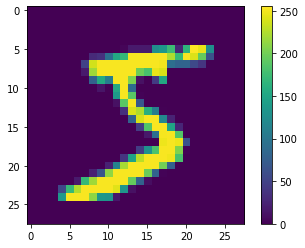

In [155]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

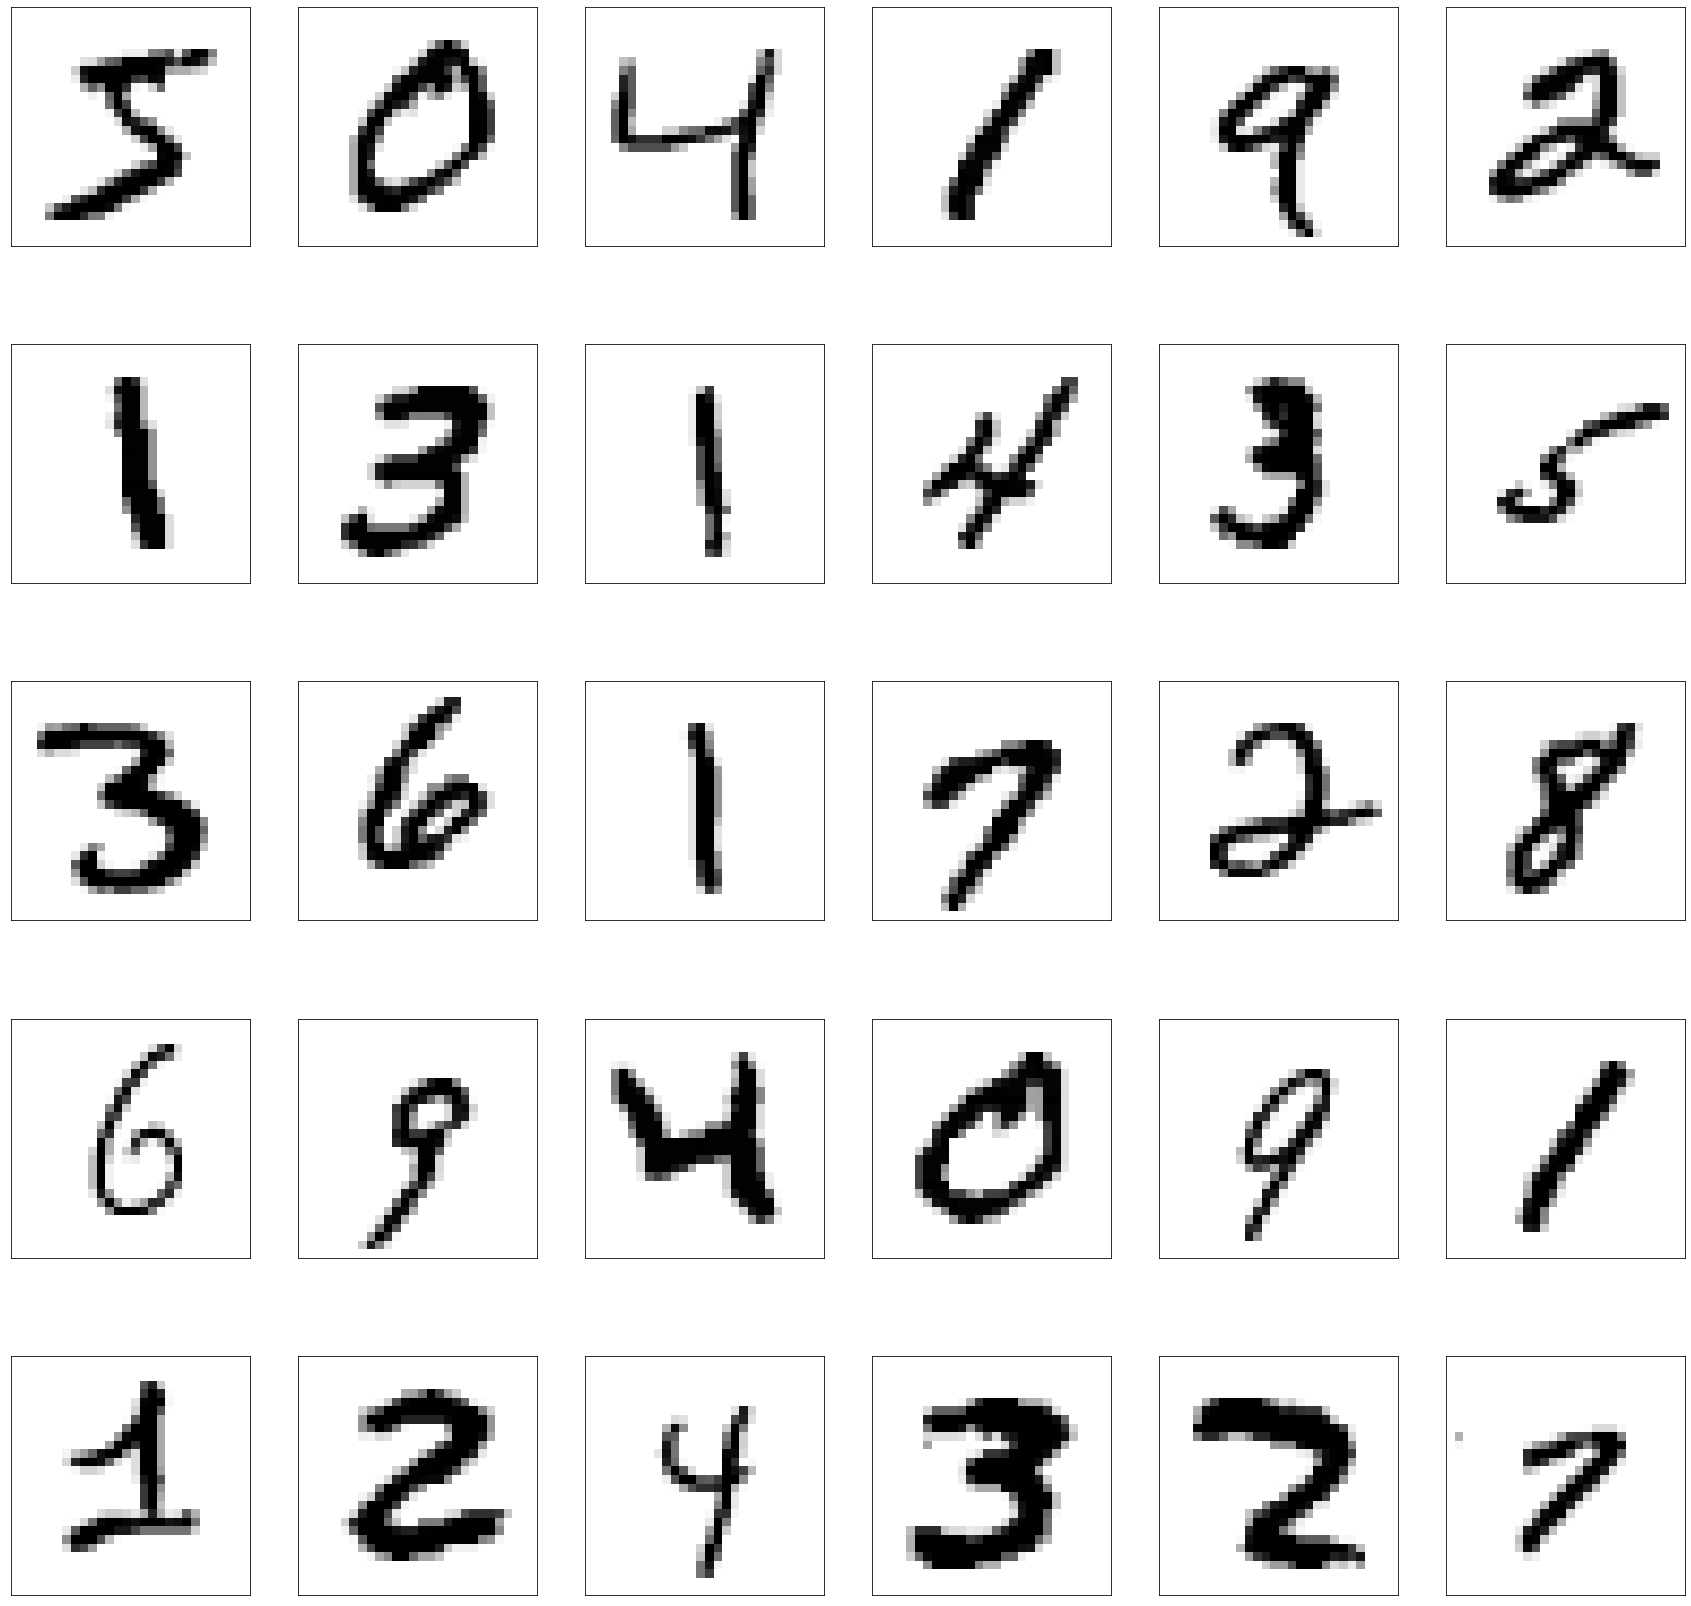

In [156]:
plt.figure(figsize=(30,30))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.02):
      print("\nReached 0.02% loss so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy' , metrics='accuracy')


In [166]:
model.fit(X_train, y_train,callbacks=[callbacks], validation_data=(X_test, y_test), batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1078 - accuracy: 0.9728 - val_loss: 0.1934 - val_accuracy: 0.9603
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0872 - accuracy: 0.9760 - val_loss: 0.2167 - val_accuracy: 0.9560
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0685 - accuracy: 0.9802 - val_loss: 0.1843 - val_accuracy: 0.9600
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0638 - accuracy: 0.9810 - val_loss: 0.1475 - val_accuracy: 0.9713
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0503 - accuracy: 0.9857 - val_loss: 0.1462 - val_accuracy: 0.9702
Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0492 - accuracy: 0.9862 - val_loss: 0.1717 - val_accuracy: 0.9696
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0526 - accuracy: 0.9849 - val_loss: 0.1545 - val_accuracy: 0.9706
Epoch 

In [0]:
#model.fit(X_train, y_train,callbacks=[callbacks], validation_data=(X_train, y_train), batch_size=128, epochs=10)

       loss  accuracy  val_loss  val_accuracy
0  0.107786  0.972833  0.193437        0.9603
1  0.087152  0.975967  0.216693        0.9560
2  0.068538  0.980233  0.184309        0.9600
3  0.063777  0.981017  0.147517        0.9713
4  0.050337  0.985667  0.146200        0.9702


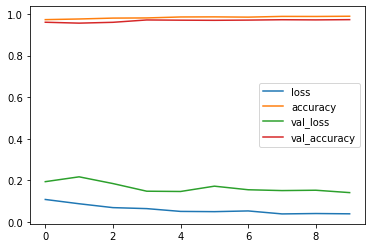

In [173]:
loss=pd.DataFrame(model.history.history)
print(loss.head())
loss.plot()

9


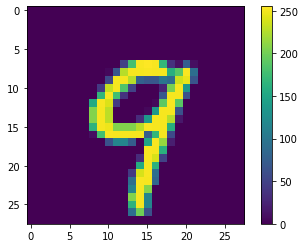

In [162]:
pred = model.predict(X_test)
print(np.argmax(pred[12]))
plt.figure()
plt.imshow(X_test[12])
plt.colorbar()
plt.grid(False)
plt.show()

7


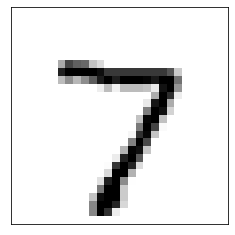

2


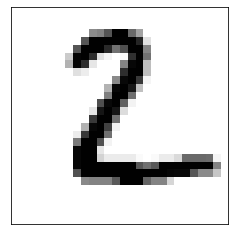

1


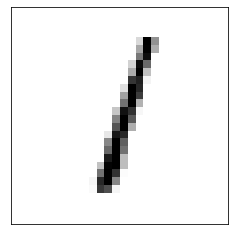

0


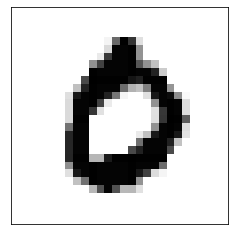

4


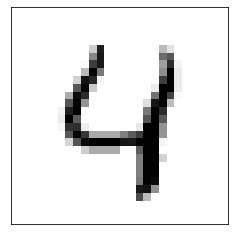

1


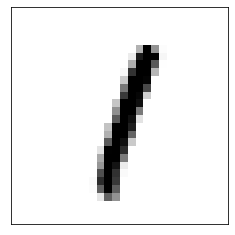

4


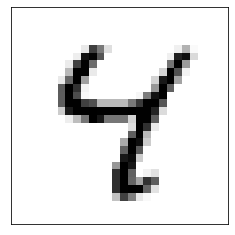

9


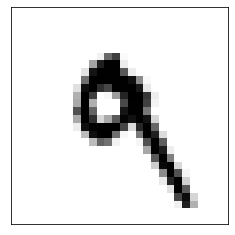

6


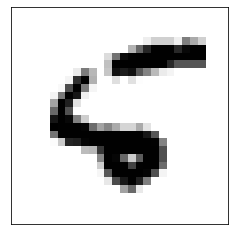

9


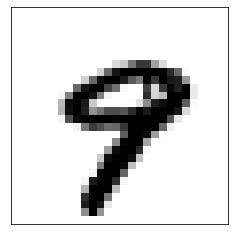

0


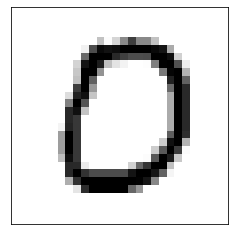

6


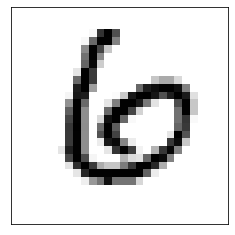

9


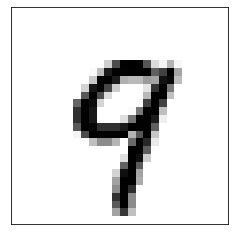

0


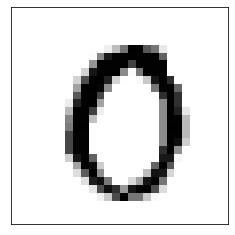

1


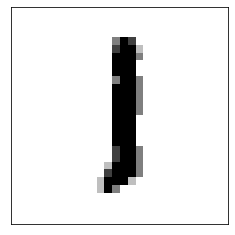

5


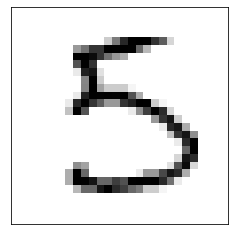

9


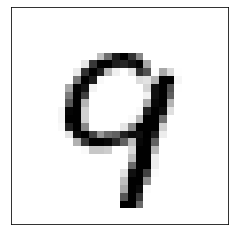

7


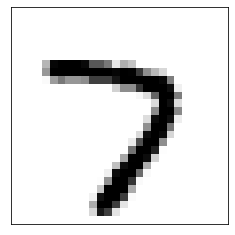

3


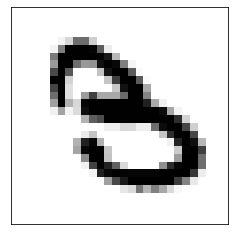

4


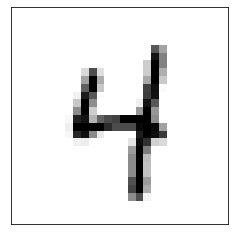

9


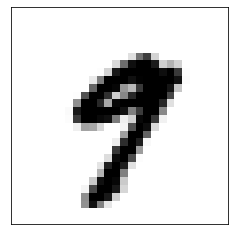

6


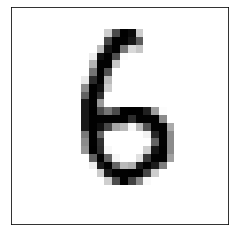

6


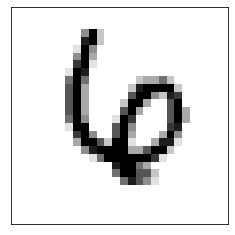

5


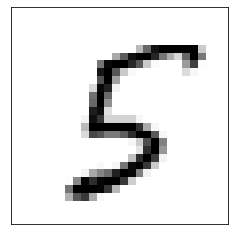

4


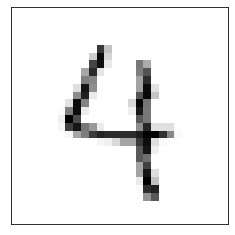

0


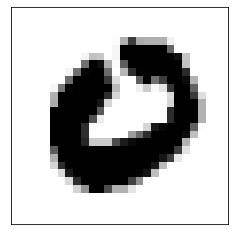

7


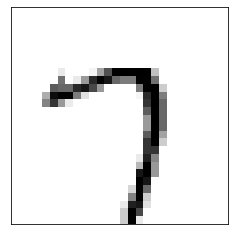

4


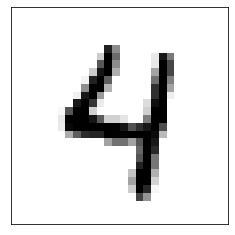

0


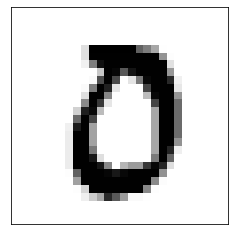

1


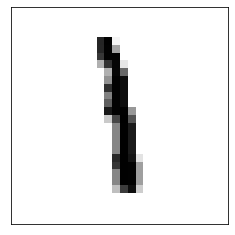

In [163]:
pred = model.predict(X_test)
plt.figure()
for i in range(30):   
    plt.xticks([])
    plt.yticks([])
    print(np.argmax(pred[i]))
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.show()

In [164]:
loss=pd.DataFrame(model.history.history)
loss.head

<bound method NDFrame.head of Empty DataFrame
Columns: []
Index: []>